In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [3]:
test = pd.read_csv("test.csv")
test_y = test.iloc[:, 0]
test_X = test.iloc[:, 1:]
test.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [4]:
val = pd.read_csv("val.csv")
val.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


In [5]:
from sklearn.mixture import GaussianMixture

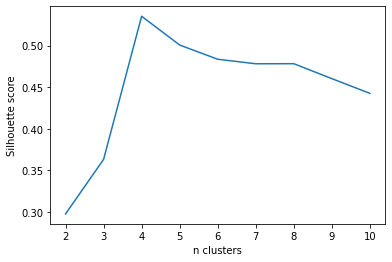

In [6]:
def count_clustering_scores(X, cluster_num, model, score_fun):      
    scores = []   
    
    for k in cluster_num:
        model_instance = model(n_components=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    return scores
    
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(train, cluster_num_seq, GaussianMixture, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec)
plt.xlabel('n clusters')
plt.ylabel('Silhouette score')
plt.show() # na szybko sprawdzić ile klastrów, kod bezczelnie przekopiowany
# 4 wygląda na najlepsze

In [7]:
gm = GaussianMixture(n_components=4)
gm.fit_predict(train)

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2,
       2, 0, 1, 3, 0, 1, 2, 3, 3, 1, 0, 0, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 3, 3, 1, 1, 2, 3, 3, 3,
       0, 2, 0, 0, 0, 0, 1])

In [8]:
y_preds = 1 - np.product(1-gm.predict_proba(test_X), axis=1) # taki wzór znalazłem - prawdopodobieństwo przynależności do jakiegokolwiek klastra z GMM
y_preds # daje dużo 1 i prawie 1

array([0.99999937, 1.        , 0.98956778, 1.        , 1.        ,
       0.94909113, 0.97214582, 0.99999993, 0.98639803, 0.99998384,
       0.99580138, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [9]:
test_y.shape # kształty się zgadzają

(17,)

In [10]:
test_y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
Name: class, dtype: int64

In [17]:
y_preds_certain = (y_preds == 1).astype("int")
y_preds_certain # przyjmuję, że jeżeli model nie jest w 100% pewny że dane pochodzą z pewnego klastra to możemy uznać punkt za outliera
# tak robię, ponieważ prawdopodobieństwa ze wzoru nie schodzą poniżej 75%

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [18]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [19]:
f1_score(test_y, y_preds_certain)

0.7272727272727272

In [20]:
precision_score(test_y, y_preds_certain)

0.6666666666666666

In [21]:
recall_score(test_y, y_preds_certain)

0.8

In [16]:
# nie wiem czy o to chodziło szczerze mówiąc

In [23]:
y_preds_val = 1 - np.product(1-gm.predict_proba(val), axis=1) 
y_preds_val

array([0.77339561, 1.        , 0.99550523, 0.99828927, 1.        ,
       0.8375559 , 0.9999999 , 1.        , 1.        , 1.        ,
       1.        , 0.99999411, 1.        , 0.99999832, 1.        ,
       0.91637193, 1.        ])